In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [95]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [96]:
df = df.dropna().reset_index(drop= True)

In [97]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [98]:
df = df.drop(122).reset_index(drop = True)

In [99]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [101]:
df.columns = df.columns.str.strip()

In [102]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [104]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 'not fire', 'fire')

In [105]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
242,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.7+ KB


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [107]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: int32(6), object(8)
memory usage: 21.0+ KB


In [109]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


In [111]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [112]:
df[["Region"]] = df[["Region"]].astype(int)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [114]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

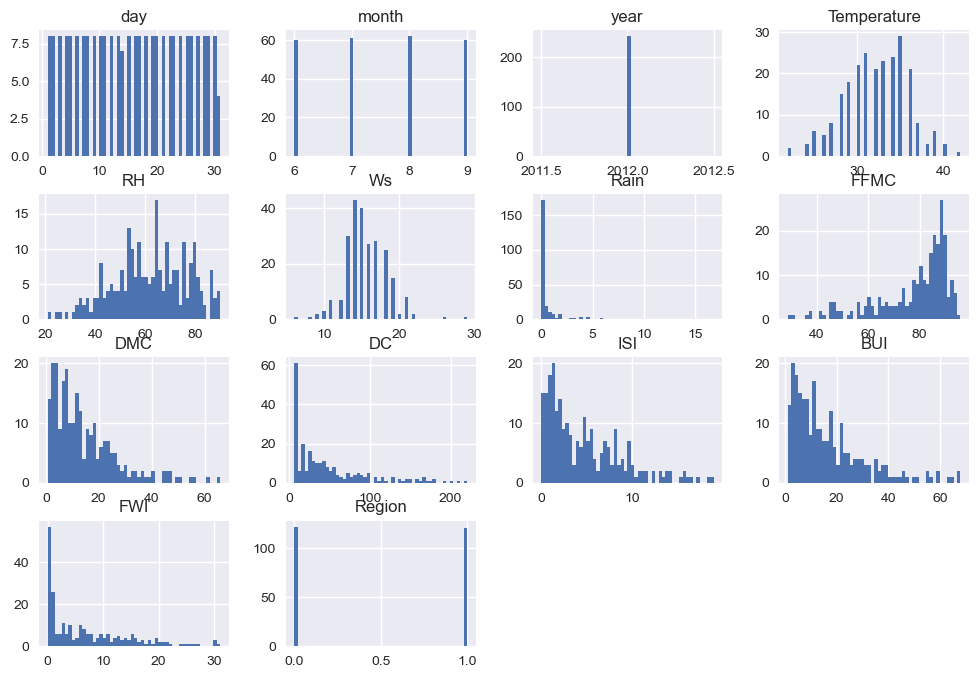

In [115]:
plt.style.use("seaborn-v0_8")
df.hist(bins=50, figsize=(12, 8))
plt.show()

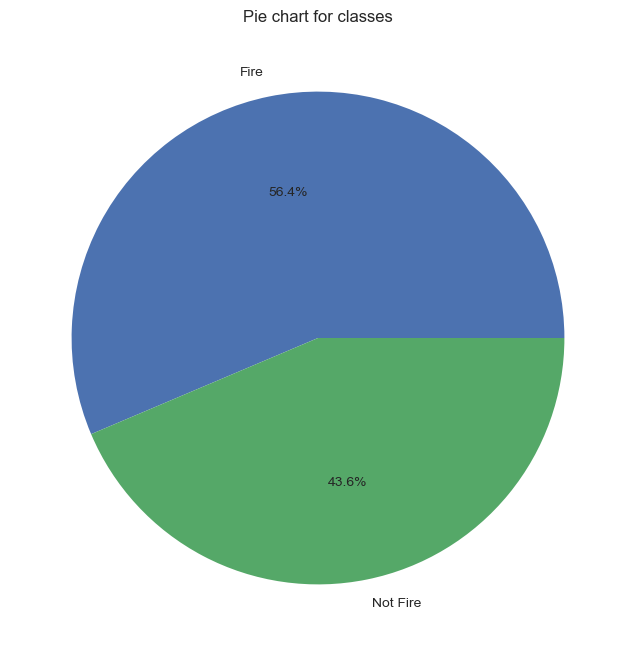

In [116]:
plt.figure(figsize=(12, 8))
plt.pie(df["Classes"].value_counts(normalize=True)*100, labels=["Fire", "Not Fire"], autopct="%1.1f%%")
plt.title("Pie chart for classes")
plt.show()

In [117]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [118]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [121]:
Y = df["FWI"]

In [122]:
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']]

In [123]:
X.shape

(243, 11)

In [124]:
Y.shape

(243,)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_test["Clases"] = X_test["Clases"].astype(object)
X_test["Clases"] = X_test["Clases"].astype(object)

In [129]:
X_train["Classes"] = np.where(X_train["Classes"].str.contains("not fire"), 0, 1)

X_test["Classes"] = np.where(X_test["Classes"].str.contains("not fire"), 0, 1)

In [57]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


In [131]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
226,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,1,1
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,1,0
168,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,1,1
206,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,1,1
144,33,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0,1


<Axes: >

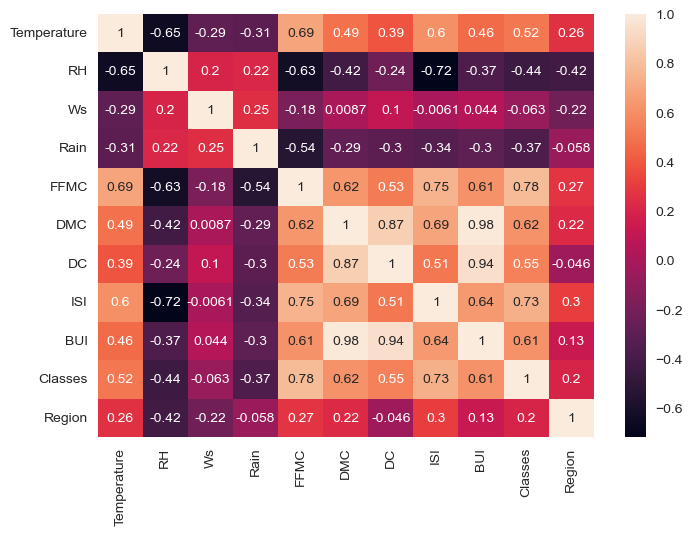

In [132]:
sns.heatmap(X_train.corr(), annot=True)

In [133]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [134]:
rel = correlation(X_train, 0.85)

In [135]:
rel

{'BUI', 'DC'}

In [136]:
X_train.drop(rel,axis= 1, inplace=True)
X_test.drop(rel,axis=1, inplace = True)

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 226 to 102
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  162 non-null    int32  
 1   RH           162 non-null    int32  
 2   Ws           162 non-null    int32  
 3   Rain         162 non-null    float64
 4   FFMC         162 non-null    float64
 5   DMC          162 non-null    float64
 6   ISI          162 non-null    float64
 7   Classes      162 non-null    int32  
 8   Region       162 non-null    int32  
dtypes: float64(4), int32(5)
memory usage: 9.5 KB


In [139]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
226,28,81,15,0.0,84.6,12.6,4.3,1,1
65,34,65,13,0.0,86.8,11.1,5.2,1,0
168,33,68,15,0.0,86.1,23.9,5.2,1,1
206,34,40,18,0.0,92.1,56.3,14.3,1,1
144,33,59,16,0.8,74.2,7.0,1.6,0,1


In [143]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
X_test_scaled

array([[-3.02000454e-01,  8.02841227e-02, -2.27628673e-01,
        -3.84476576e-01,  6.43451873e-01, -7.48542807e-02,
         2.08999063e-01,  9.05662586e-01, -1.01242284e+00],
       [ 2.47708237e-01, -5.90129685e-01, -9.87955373e-01,
        -3.84476576e-01,  7.49493788e-01, -4.04459160e-01,
         3.70666824e-01,  9.05662586e-01, -1.01242284e+00],
       [-1.12656349e+00, -3.21964162e-01,  9.12861378e-01,
         6.02042154e-01, -9.82524172e-01, -9.18029554e-01,
        -8.30293687e-01, -1.10416397e+00,  9.87729597e-01],
       [ 5.22562583e-01, -3.21964162e-01, -9.87955373e-01,
        -2.94793055e-01,  1.34450676e-01,  2.70081058e-01,
        -6.22435137e-01, -1.10416397e+00,  9.87729597e-01],
       [-5.76854799e-01,  1.47325503e-01, -6.07792023e-01,
        -3.84476576e-01,  5.51548879e-01,  6.31198549e-02,
        -6.81456700e-02,  9.05662586e-01,  9.87729597e-01],
       [ 1.89683431e+00,  8.02841227e-02, -2.50860877e+00,
         1.53624550e-01, -2.68508604e-01, -2.664850

Text(0.5, 1.0, 'Effect of scaling')

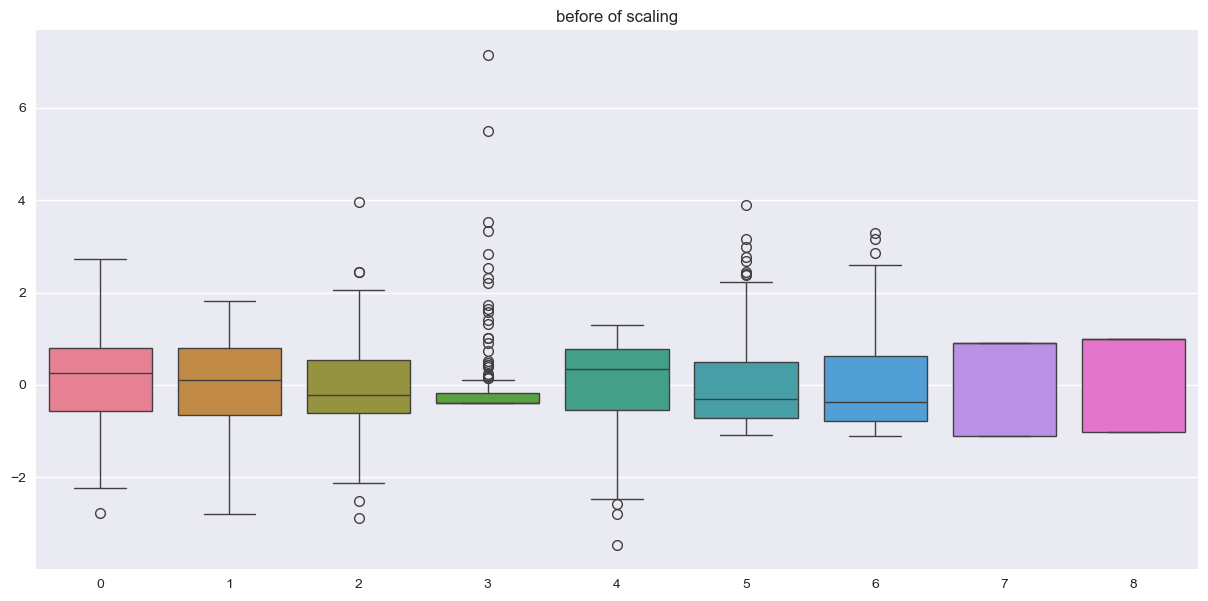

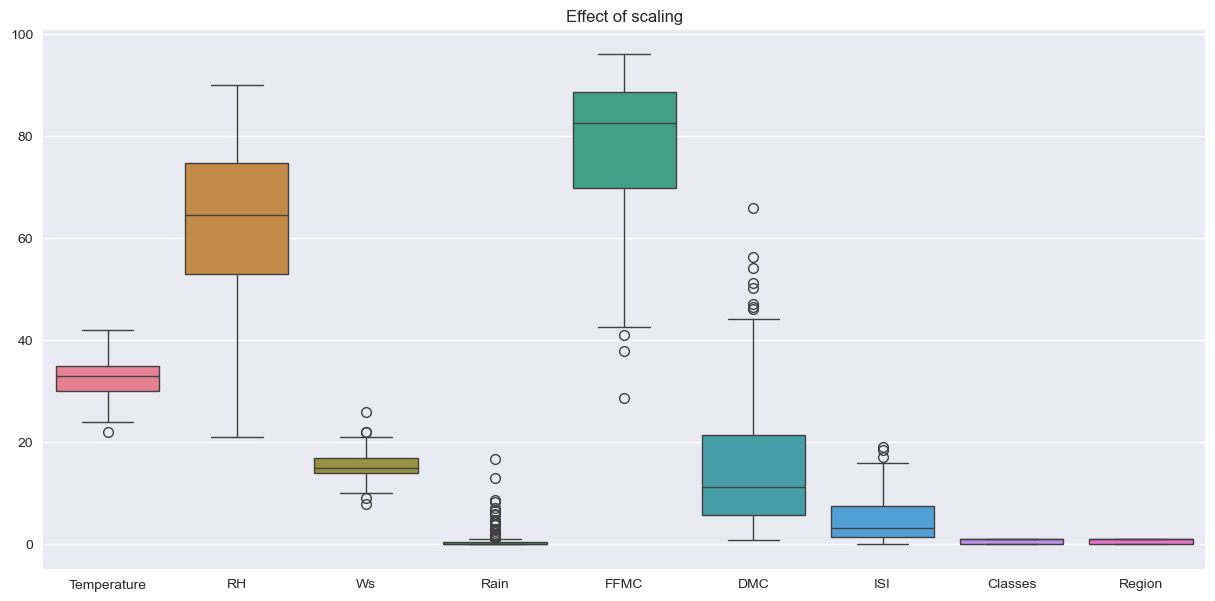

In [146]:
plt.subplots(figsize=(15, 7))
sns.boxplot(data=X_train_scaled)
plt.title("before of scaling")

plt.subplots(figsize=(15, 7))
sns.boxplot(data=X_train)
plt.title("Effect of scaling")

In [147]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [149]:
regression.fit(X_train_scaled, Y_train)

LinearRegression()

In [151]:
y_predict = regression.predict(X_test_scaled)

In [152]:
y_predict

array([ 8.22824619,  7.78215852, -0.25828998,  4.38055759,  6.68222943,
        1.3622597 ,  1.99945794,  7.8355231 ,  1.75018462,  3.38281514,
        0.39430907,  9.77499654,  9.34088351, 17.0031456 , 18.46405093,
        1.27800873,  1.96842081, -0.13276177,  7.16594485,  3.0815781 ,
        1.40741562,  0.18075746,  6.61692105,  0.30350512, 21.01326642,
        5.12525044,  5.95195917,  9.79455912, -0.10781944,  9.74431038,
        6.59526666, -0.41271825, 10.37821088, 14.54681696,  1.534249  ,
        0.44968093,  2.03021843,  6.11533999, -0.58567088, -0.50816843,
        6.70967918,  1.89400102,  8.65548055, -0.39939666, 15.42446579,
        8.30696806,  8.17037058,  1.429858  , 12.91587627,  1.21897904,
       29.50229226,  5.57023   , 17.21300934, 19.44599949, 13.78147012,
       16.16976915,  0.66101829,  8.98278392,  3.59370818, 14.64105141,
        5.14896687,  0.79459158, -0.54252859, 21.87012705,  3.25163001,
        1.75067189,  9.70047411,  6.92953233, 10.47866997, -0.37

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, y_predict)
mse = mean_squared_error(Y_test, y_predict)
rmse = np.sqrt(mse)
score = r2_score(Y_test, y_predict)

In [154]:
print(mae)
print(mse)
print(rmse)
print(score)

0.5767877823415986
0.6789097213117232
0.8239597813678307
0.9845563190792226


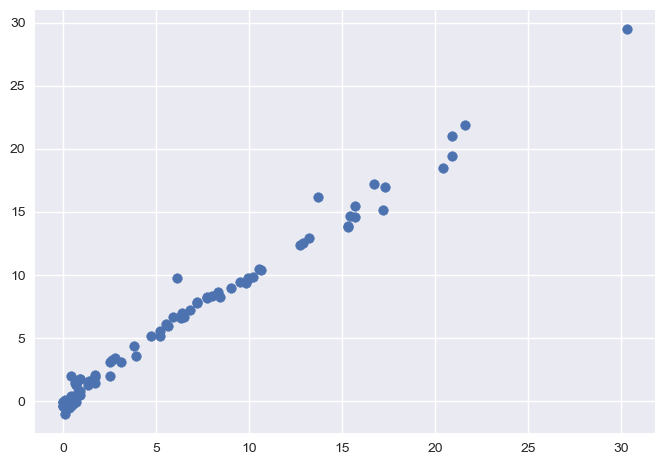

In [155]:
plt.scatter(Y_test, y_predict)

In [156]:
from sklearn.linear_model import Lasso

In [157]:
lasso = Lasso()

In [160]:
lasso.fit(X_train_scaled, Y_train)
y_predict = lasso.predict(X_test_scaled)
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score = r2_score(Y_test, y_predict)
print(mae)
print(mse)
print(score)

1.1053469612945108
2.1360242862088676
0.9514102148198662


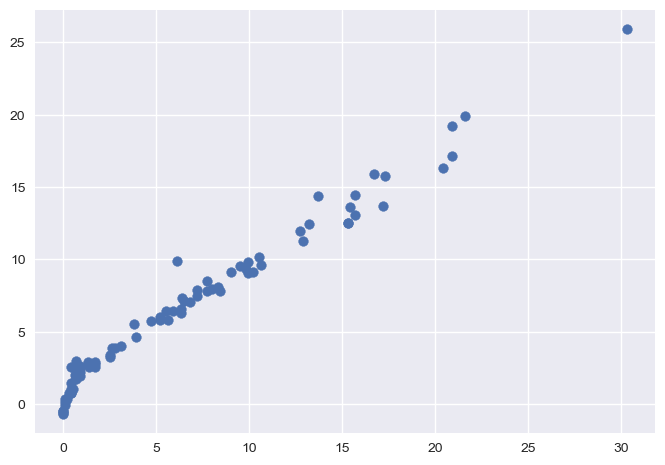

In [161]:
plt.scatter(Y_test, y_predict)

In [162]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)

Ridge()

In [163]:
y_predict = ridge.predict(X_test_scaled)

In [164]:
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score = r2_score(Y_test, y_predict)
print(mae)
print(mse)
print(score)

0.5953582907340897
0.7052780292328977
0.9839564989246833


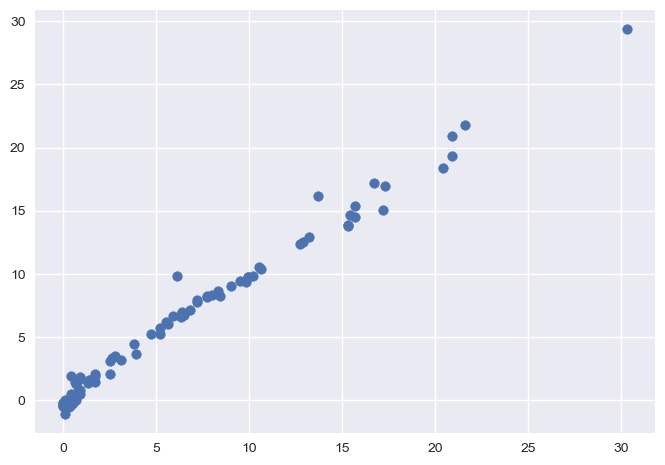

In [166]:
plt.scatter(Y_test,y_predict)

In [169]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)

In [170]:
lassocv.fit(X_train_scaled, Y_train)

LassoCV(cv=5)

In [171]:
lassocv.alpha_

0.03318346689607894

In [172]:
lassocv.alphas_

array([7.14916122, 6.66733168, 6.21797584, 5.79890508, 5.40807829,
       5.04359191, 4.7036707 , 4.38665903, 4.0910129 , 3.81529232,
       3.55815439, 3.31834669, 3.09470123, 2.88612872, 2.69161331,
       2.51020758, 2.34102799, 2.18325054, 2.03610676, 1.89887998,
       1.77090182, 1.65154897, 1.54024009, 1.43643307, 1.33962229,
       1.24933623, 1.16513515, 1.08660894, 1.01337513, 0.94507704,
       0.88138201, 0.82197981, 0.76658112, 0.71491612, 0.66673317,
       0.62179758, 0.57989051, 0.54080783, 0.50435919, 0.47036707,
       0.4386659 , 0.40910129, 0.38152923, 0.35581544, 0.33183467,
       0.30947012, 0.28861287, 0.26916133, 0.25102076, 0.2341028 ,
       0.21832505, 0.20361068, 0.189888  , 0.17709018, 0.1651549 ,
       0.15402401, 0.14364331, 0.13396223, 0.12493362, 0.11651351,
       0.10866089, 0.10133751, 0.0945077 , 0.0881382 , 0.08219798,
       0.07665811, 0.07149161, 0.06667332, 0.06217976, 0.05798905,
       0.05408078, 0.05043592, 0.04703671, 0.04386659, 0.04091

In [176]:
y_predict = lassocv.predict(X_test_scaled)

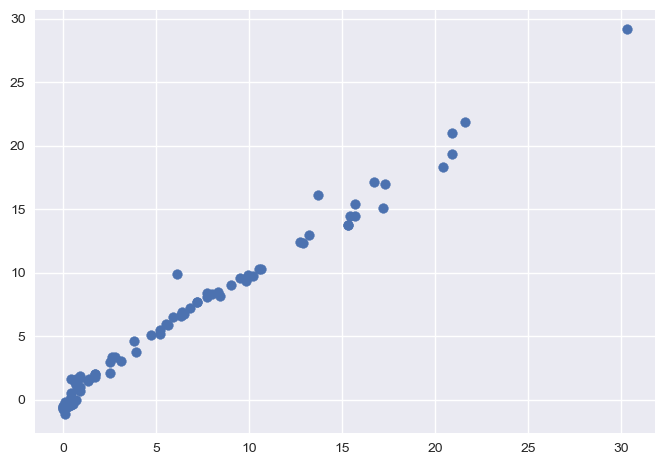

In [177]:
plt.scatter(Y_test, y_predict)

In [178]:
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score = r2_score(Y_test, y_predict)
print(mae)
print(mse)
print(score)

0.6041813665539069
0.719640436557764
0.983629786213086


In [179]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv= 5)
ridgecv.fit(X_train_scaled, Y_train)
y_predict = ridgecv.predict(X_test_scaled)

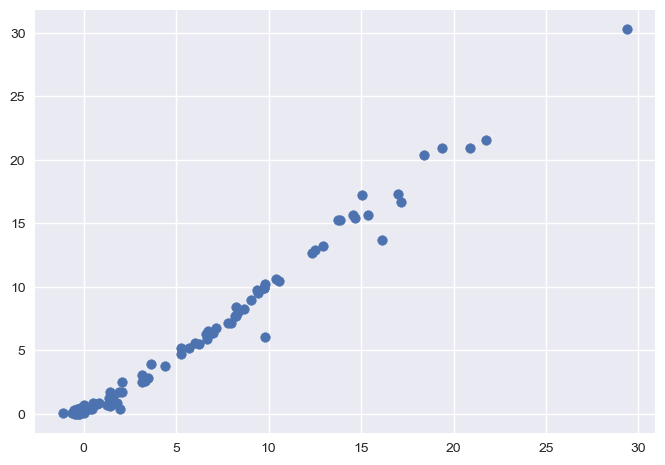

In [181]:
plt.scatter(y_predict, Y_test)

In [182]:
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score = r2_score(Y_test, y_predict)
print(mae)
print(mse)
print(score)

0.5953582907340897
0.7052780292328977
0.9839564989246833


In [183]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

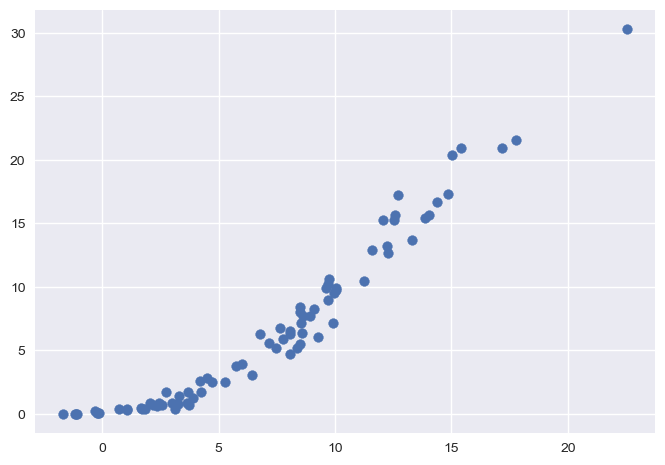

In [185]:
from sklearn.linear_model import ElasticNet
elasticnetnet = ElasticNet()
elasticnet.fit(X_train_scaled, Y_train)
y_predict = elasticnet.predict(X_test_scaled)
plt.scatter(y_predict, Y_test)

In [186]:
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score = r2_score(Y_test, y_predict)
print(mae)
print(mse)
print(score)

1.8345453375875518
5.163443276262983
0.8825431896054334


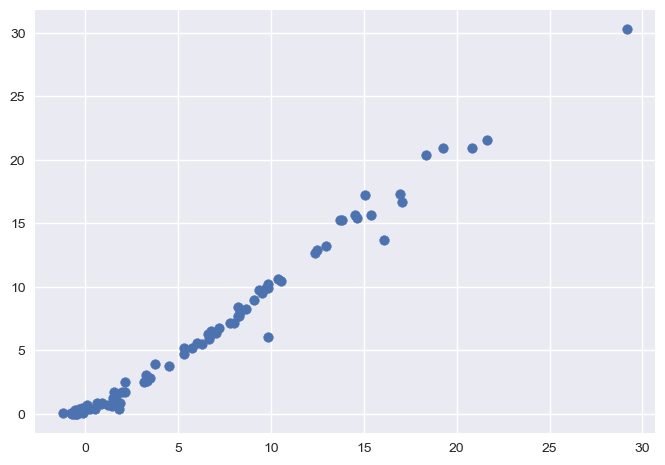

In [187]:
from sklearn.linear_model import ElasticNetCV
elasticnetnetcv = ElasticNetCV(cv = 5)
elasticnetnetcv.fit(X_train_scaled, Y_train)
y_predict = elasticnetnetcv.predict(X_test_scaled)
plt.scatter(y_predict, Y_test)

In [188]:
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score = r2_score(Y_test, y_predict)
print(mae)
print(mse)
print(score)

0.6264581775240792
0.7489325624653929
0.9829634557249401


In [189]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))